# Laboratorio Integrador #4

En el siguiente laboratorio analizaremos dos casos de estudios diferentes:

1.   Análisis de Electrocardiogramas (ECG) usando técnicas no supervisadas (time series clustering - kshape algorithm) en un dataset de baja numerosidad
2.   Análisis de propagación de estiquetas usando técnicas semisupervisadas (label propagation, label spreading) en un dataset de baja numerosidad.

Objetivo:
*   Aplicar el k-shape algorithm sobre un dataset de ECG de baja dimensionalidad y determinar la efectividad de la clusterización basado en la forma.
*   Aplicar varias técnicas semisuvrersidad par etiquetar un dataset de baja numerosidad y medir el desempeño del etiquetado.
*   Presentar un análisis de desepeño de clasificación para cada caso de estudio.

*Caso estudio del k-shape:*
1.   Tarea individual.
2.   Implementar una arquitectura k-shape y aplicarla al dataset  ECG200 (200 instancias y 2 clases) (https://www.timeseriesclassification.com/description.php?Dataset=ECG200).
3.   Realizar un flujo experimental que permita entrenar el modelo y evaluar la calidad de clusterización en el entrenamiento y en el test externo.
4.   Realizar un análisis de resultados de entrenamiento y prueba (viualizar los clusters, métricas no supervisadas y algunas supervisadas).
5.   Subir a la carpeta de trabajo en el D2L, el cuaderno desarrollado.

*Caso estudio del label propagation and spreading:*
1.   Tarea individual.
2.   Implementar las arquitecturas label propagation and spreading y aplicarla al dataset  *Letter Recognition* (800 approx. instancias por clase) y 26 clases (A-Z) (https://archive.ics.uci.edu/dataset/59/letter+recognition). Del dataset presentado, escoger 5 clases aleatorias para minimizar el impacto de clasificación multiclase. Procesar el dataset para dejar sólo 10 puntos etiquetados por clase (5 clases aleatorias).
3.   Aplicar los modelos de label propagation and spreading al dataset preprocesado y visualizar los resultados de propagación usando una técnica T-SNE en dos dimensionaes.
4.   Entrenar un modelo de clasifiación supervisado con el nuevo dataset etiquetado y medir el desempeño de clasificación. Esto es un problema de clasificación multiclase.
5.   Realizar un análisis de resultados entre los modelos de etiquetado.
6.   Subir a la carpeta de trabajo en el D2L, el cuaderno desarrollado.

+1punto: Aplicar y Clasificar la propagación de etiquetas en un espacio latente reducido por AEs o técnicas no lineales. 

Valor:
*   25 puntos (14.5 por cada caso estudio)

Penalizaciones:
*   Cualquier error de implementación o concepto, se penalizará con -1 punto (acumulativo).
*   La no realización de la implementación y aplicación se penalizará con el 40%
*   La no realización de un análisis de discusión de resultados se penalizará con el 40%
*   La no realización conclusiones se penalizará con el 20%
*   La no realización de la entrega de la actividad se penalizará con el 100%


In [172]:
#!pip install tslearn
#! pip install matplotlib

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

### Load data and exploration

In [174]:
# Cargar los datasets
data_train = np.loadtxt("ECG200/ECG200_TRAIN.txt", delimiter=None)
X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(int)
data_test = np.loadtxt("ECG200/ECG200_TEST.txt", delimiter=None)
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(int)

In [175]:
# Escalar las series temporales para la media y la varianza
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Estandarizar para tener media 0 y varianza 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [176]:
# Estadísticas básicas
print("Número de series temporales:", len(data_train))
print("Número de clases únicas:", len(np.unique(data_train[:,0])))
print("Longitud de las series temporales:", len(data_train[0,1:]))

Número de series temporales: 100
Número de clases únicas: 2
Longitud de las series temporales: 96


In [177]:
# Número de ejemplos por clase en el conjunto de entrenamiento
print("Número de series temporales en clase 1.0:", len(data_train[data_train[:,0]==1.0]))
print("Número de series temporales en clase 2.0:", len(data_train[data_train[:,0]==-1.0]))

Número de series temporales en clase 1.0: 69
Número de series temporales en clase 2.0: 31


### Caso estudio 1: Clusterización en series temporales

c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

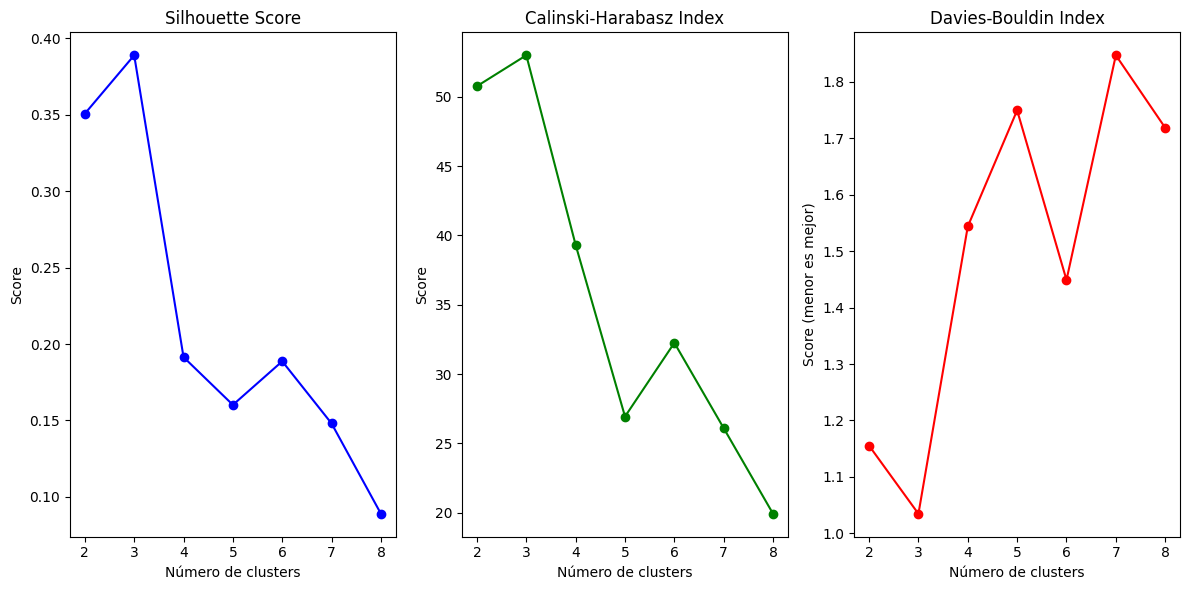

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Asegúrate de tener X_train_scaled definido, de forma (n_samples, n_timestamps, 1) o (n_samples, n_timestamps)
X = X_train_scaled.squeeze()  # Asegura que esté en 2D: (n_samples, n_timestamps)

# Rango de clusters a probar
cluster_range = range(2, 9)

# Almacenar resultados
silhouette_scores = []
calinski_scores = []
davies_scores = []

for n_clusters in cluster_range:
    # Inicializar y entrenar KMeans ks = KShape(n_clusters=n_clusters, n_init=1, random_state=0)
    kmeans = KShape(n_clusters=n_clusters, n_init=1, random_state=0)
    kmeans.fit_predict(X)
    
    # Etiquetas del clustering
    labels = kmeans.labels_
    
    # Calcular métricas internas
    sil_score = silhouette_score(X, labels)
    calinski_score = calinski_harabasz_score(X, labels)
    davies_score = davies_bouldin_score(X, labels)
    
    # Guardar resultados
    silhouette_scores.append(sil_score)
    calinski_scores.append(calinski_score)
    davies_scores.append(davies_score)

# Plot de las métricas
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', color='blue')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(cluster_range, calinski_scores, marker='o', color='green')
plt.title("Calinski-Harabasz Index")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(cluster_range, davies_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index")
plt.xlabel("Número de clusters")
plt.ylabel("Score (menor es mejor)")

plt.tight_layout()
plt.show()


In [179]:
# Inicializar el modelo K-Shape
n_clusters = 3
ks = KShape(n_clusters=n_clusters, n_init=1, random_state=0)

# Ajustar el modelo
y_pred_train = ks.fit_predict(X_train_scaled)

# Predecir los clusters
y_pred_test = ks.predict(X_train_scaled)

c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jeff_\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

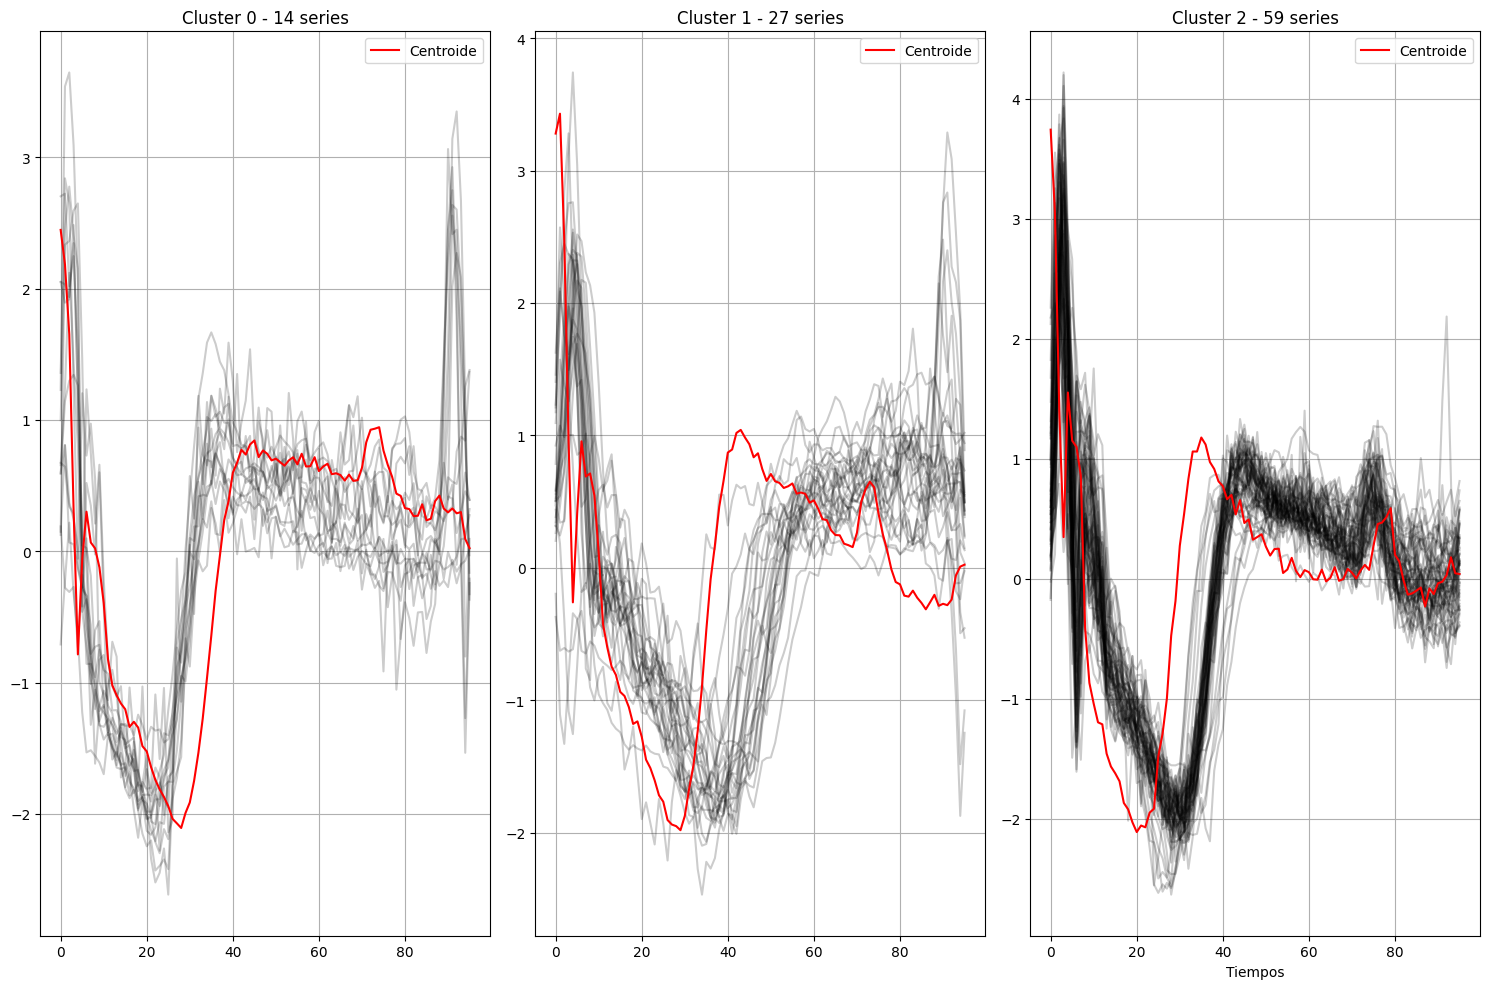

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de tener estas variables ya definidas:
# - X_train_scaled: (n_samples, n_timestamps)
# - kmeans: modelo ya ajustado
# - y_pred_train: etiquetas predichas (kmeans.labels_)

n_clusters = 3
n_timestamps = X_train_scaled.shape[1]

# Obtener los centroides (en KMeans están en forma aplanada si se entrenó sobre 2D)
centroids = kmeans.cluster_centers_  # (n_clusters, n_timestamps)

# Crear una subgráfica por cada cluster
fig, axs = plt.subplots(1, n_clusters, figsize=(15, 10), sharex=True)

for cluster_id in range(n_clusters):
    ax = axs[cluster_id] if n_clusters > 1 else axs

    # Series del cluster actual
    cluster_series = X_train_scaled[y_pred_train == cluster_id]

    # Graficar todas las series del cluster
    for series in cluster_series:
        ax.plot(series, alpha=0.2, color="black")

    # Graficar el centroide del cluster
    ax.plot(centroids[cluster_id], color="red", label="Centroide")

    ax.set_title(f"Cluster {cluster_id} - {len(cluster_series)} series")
    ax.legend()
    ax.grid(True)

plt.xlabel("Tiempos")
plt.tight_layout()
plt.show()

In [181]:
from scipy.stats import mode
from sklearn.metrics import f1_score
def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in np.unique(y_pred):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

mapped_train = map_clusters_to_labels(y_train, y_pred_train)
mapped_test = map_clusters_to_labels(y_test, y_pred_test)

print("\nAccuracy supervisado:")
print("Train Accuracy:", f1_score(y_train, mapped_train))
print("Test Accuracy:", f1_score(y_test, mapped_test))



Accuracy supervisado:
Train Accuracy: 0.84375
Test Accuracy: 0.7804878048780488


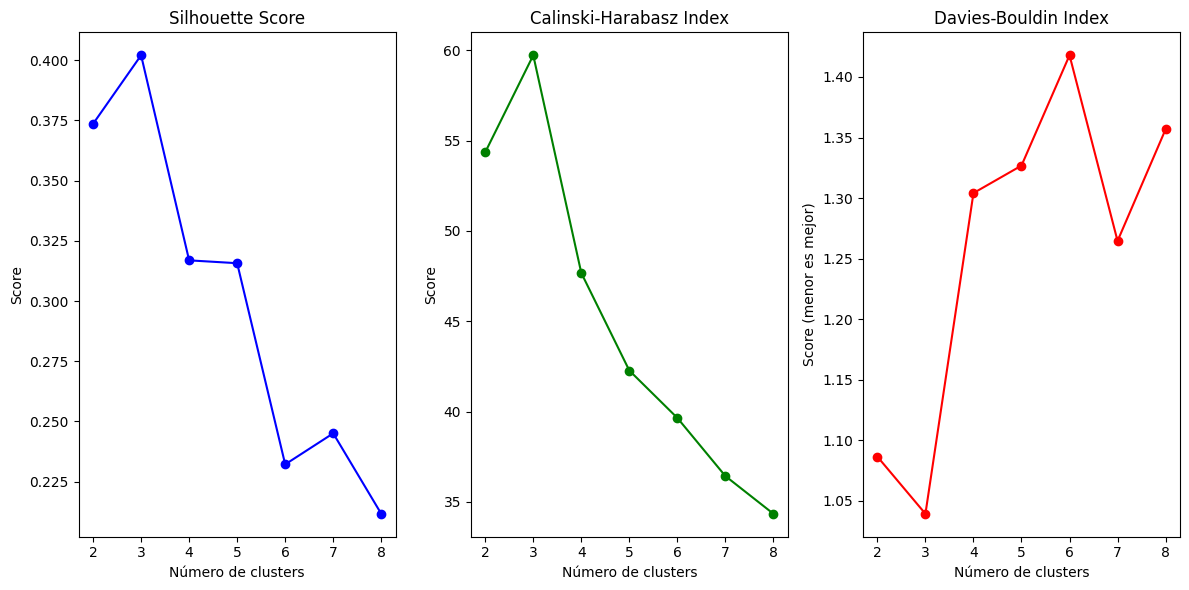

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Asegúrate de tener X_train_scaled definido, de forma (n_samples, n_timestamps, 1) o (n_samples, n_timestamps)
X = X_train_scaled.squeeze()  # Asegura que esté en 2D: (n_samples, n_timestamps)

# Rango de clusters a probar
cluster_range = range(2, 9)

# Almacenar resultados
silhouette_scores = []
calinski_scores = []
davies_scores = []

for n_clusters in cluster_range:
    # Inicializar y entrenar KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit_predict(X)
    
    # Etiquetas del clustering
    labels = kmeans.labels_
    
    # Calcular métricas internas
    sil_score = silhouette_score(X, labels)
    calinski_score = calinski_harabasz_score(X, labels)
    davies_score = davies_bouldin_score(X, labels)
    
    # Guardar resultados
    silhouette_scores.append(sil_score)
    calinski_scores.append(calinski_score)
    davies_scores.append(davies_score)

# Plot de las métricas
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', color='blue')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(cluster_range, calinski_scores, marker='o', color='green')
plt.title("Calinski-Harabasz Index")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(cluster_range, davies_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index")
plt.xlabel("Número de clusters")
plt.ylabel("Score (menor es mejor)")

plt.tight_layout()
plt.show()


In [183]:
from sklearn.cluster import KMeans
import numpy as np

# Determinar el número de clusters
n_clusters = 3

# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)

# Ajustar el modelo a los datos de entrenamiento
kmeans.fit(X_train_scaled.squeeze())

# Predecir los clusters para los datos de entrenamiento
y_pred_train = kmeans.labels_

# Predecir los clusters para los datos de prueba (o también sobre entrenamiento, como en tu ejemplo)
y_pred_test = kmeans.predict(X_train_scaled.squeeze())


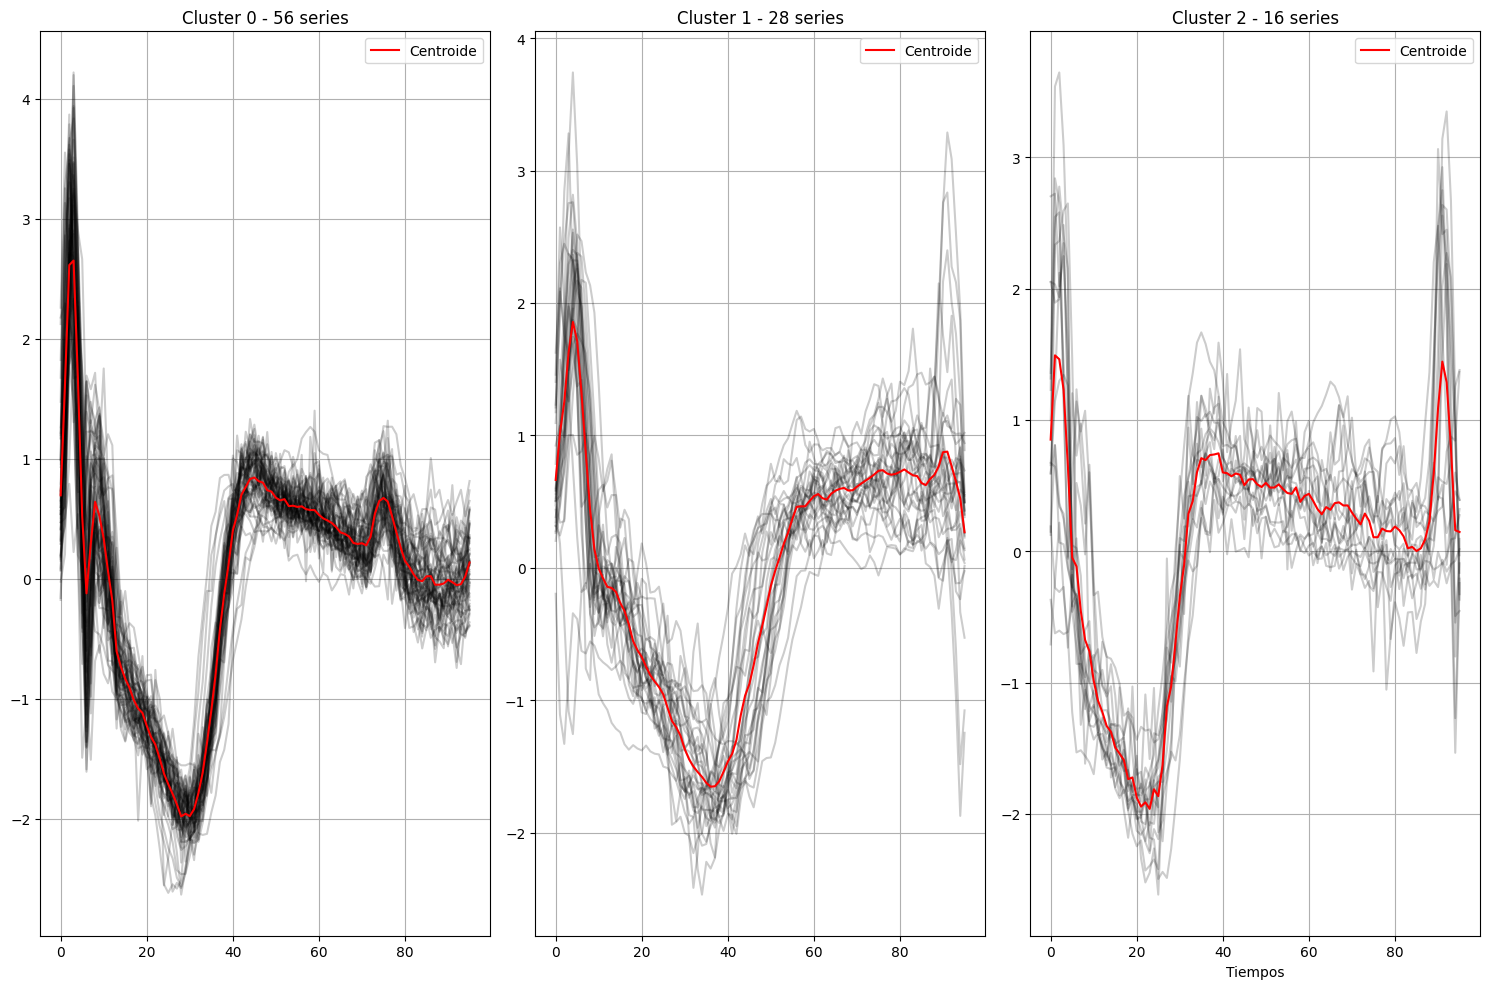

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de tener estas variables ya definidas:
# - X_train_scaled: (n_samples, n_timestamps)
# - kmeans: modelo ya ajustado
# - y_pred_train: etiquetas predichas (kmeans.labels_)

n_clusters = 3
n_timestamps = X_train_scaled.shape[1]

# Obtener los centroides (en KMeans están en forma aplanada si se entrenó sobre 2D)
centroids = kmeans.cluster_centers_  # (n_clusters, n_timestamps)

# Crear una subgráfica por cada cluster
fig, axs = plt.subplots(1, n_clusters, figsize=(15, 10), sharex=True)

for cluster_id in range(n_clusters):
    ax = axs[cluster_id] if n_clusters > 1 else axs

    # Series del cluster actual
    cluster_series = X_train_scaled[y_pred_train == cluster_id]

    # Graficar todas las series del cluster
    for series in cluster_series:
        ax.plot(series, alpha=0.2, color="black")

    # Graficar el centroide del cluster
    ax.plot(centroids[cluster_id], color="red", label="Centroide")

    ax.set_title(f"Cluster {cluster_id} - {len(cluster_series)} series")
    ax.legend()
    ax.grid(True)

plt.xlabel("Tiempos")
plt.tight_layout()
plt.show()

In [185]:
from scipy.stats import mode
from sklearn.metrics import f1_score
def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in np.unique(y_pred):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

mapped_train = map_clusters_to_labels(y_train, y_pred_train)
mapped_test = map_clusters_to_labels(y_test, y_pred_test)

print("\nAccuracy supervisado:")
print("Train Accuracy:", f1_score(y_train, mapped_train))
print("Test Accuracy:", f1_score(y_test, mapped_test))



Accuracy supervisado:
Train Accuracy: 0.832
Test Accuracy: 0.7804878048780488


#### Análisis de resultados

Durante el experimento realizado con el algoritmo K-Shape sobre un conjunto de datos etiquetado con clases "normal" y "anormal", se observó que los mejores resultados de agrupamiento se obtenían con tres clústeres. Este hallazgo sugiere la posible existencia de una tercera categoría o comportamiento en los datos que merece un análisis más profundo, más allá de la clasificación binaria original.

Tanto K-Shape como K-Means generaron agrupamientos consistentes entre sí, lo que refuerza la relevancia de los patrones detectados y la validez del agrupamiento como herramienta exploratoria en el tercer estado.

No obstante, el análisis visual y estructural de los centroides revela diferencias importantes. K-Shape presenta una ventaja significativa al capturar la forma y la fase de las series temporales, lo cual le permite anticiparse mejor a ciertos comportamientos críticos en los datos. Esta capacidad de representar picos y fluctuaciones de manera más precisa lo posiciona como una herramienta más adecuada para el análisis de series temporales complejas.

Por otro lado, K-Means tiende a centrarse en el promedio de las formas, sin capturar adecuadamente las variaciones temporales más relevantes, especialmente en los picos de las señales. Su utilidad se mantiene alta en escenarios donde los datos están claramente agrupados y se busca una reducción de dimensionalidad, pero su aplicación en series temporales podría limitar la interpretación de patrones dinámicos.

En el enfoque supervisado, los resultados obtenidos fueron altamente satisfactorios. Se alcanzó un F1-score superior al 80% en el conjunto de entrenamiento, y aproximadamente un 80% en el conjunto de prueba, lo cual indica una buena capacidad de generalización del modelo, especialmente considerando que los datos presentan una alta dispersión.

Además, la consistencia entre las métricas de entrenamiento y prueba refleja que el modelo no está sobreajustado, lo que valida su robustez. Este comportamiento sugiere que, bajo un enfoque supervisado, el modelo logra una clasificación precisa y confiable, incluso en contextos de datos con variabilidad significativa.

#### Conclusiones

Existencia de una posible tercera categoría en los datos:
Aunque el dataset original clasifica los datos como "normal" y "anormal", el análisis con algoritmos de clustering identificó tres grupos óptimos, lo que indica la presencia de un comportamiento intermedio o atípico que debería ser analizado más a fondo. Esto representa una oportunidad para enriquecer los criterios de clasificación actuales.

K-Shape muestra una mayor capacidad para modelar series temporales complejas:
A diferencia de K-Means, el algoritmo K-Shape alinea y conserva mejor la forma de las secuencias temporales, representando adecuadamente los picos y las variaciones en el tiempo. Esta precisión lo convierte en una herramienta más efectiva para análisis predictivos o de comportamiento en datos temporales.

K-Means es útil en agrupamientos generales, pero menos eficaz para datos temporales:
Si bien K-Means ofrece agrupamientos consistentes y es útil para reducción de dimensionalidad o datos estáticos, su representación centrada en promedios limita su capacidad para capturar dinámicas temporales clave. Por tanto, su aplicación se recomienda en contextos distintos a los de series temporales.

### Caso estudio 2: Propagacíon de etiquetas semi-supervisada

In [186]:
# CARGAR DATOS 
import pandas as pd

# Leer el archivo txt
df = pd.read_csv("C:/Users/ASUS/Documents/Maestria/Semana_4_ANS/letter+recognition/letter-recognition.data", header=None)

# Asignar nombres de columna
df.columns = ['Label'] + [f'Feature {i}' for i in range(1, df.shape[1])]

# Mostrar el DataFrame
print(df)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ASUS/Documents/Maestria/Semana_4_ANS/letter+recognition/letter-recognition.data'

#### Análisis de resultados

In [ ]:
import random
import string
# Obtener 5 letras aleatorias del alfabeto (en mayúsculas)
random.seed(42)
letras_aleatorias = random.sample(string.ascii_uppercase, 5)

# Mostrar las letras seleccionadas
print("Letras seleccionadas:", letras_aleatorias)
total=[]
# Filtrar e imprimir por cada letra
for letra in letras_aleatorias:
    df_sample = df[df["Label"] == letra]
    total.append(df_sample)
df_total = pd.concat(total, ignore_index=True)
print(df_total)

Letras seleccionadas: ['U', 'D', 'A', 'X', 'I']
     Label  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0        U          7         11          8          9          4          3   
1        U          4          7          4          5          2          7   
2        U          5          6          5          4          2          5   
3        U          3          3          3          1          1          5   
4        U          5          7          6          5          5          8   
...    ...        ...        ...        ...        ...        ...        ...   
3944     I          3          9          5          6          6         10   
3945     I          1          3          1          2          1          7   
3946     I          2          5          0          7          0          7   
3947     I          1          5          1          4          1          8   
3948     I          5         12          5          6          3       

In [ ]:
muestras_10 = []
indices_a_quitar = []

for letra in letras_aleatorias:
    df_letra = df_total[df_total["Label"] == letra]
    # Tomar muestra del 10%
    muestra = df_letra.sample(frac=0.1, random_state=42)
    # Guardar la muestra
    muestras_10.append(muestra)
    # Guardar los índices de las filas para eliminar
    indices_a_quitar.extend(muestra.index)

# DataFrame con el 10%
df_10 = pd.concat(muestras_10, ignore_index=True)

# Eliminar esas filas del df_total original
df_total_filtrado = df_total.drop(index=indices_a_quitar).reset_index(drop=True)

# Mostrar resultados
print("\n➡️ 10% de cada letra (df_10):")
print(df_10)

print("\n➡️ 90% restante (df_total_filtrado):")
print(df_total_filtrado)


➡️ 10% de cada letra (df_10):
    Label  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0       U          3          3          4          2          1          7   
1       U          7         11          8          8          5          3   
2       U          4          7          6          5          5          9   
3       U          3          7          4          5          3          7   
4       U          2          0          2          1          1          8   
..    ...        ...        ...        ...        ...        ...        ...   
390     I          7          8          9          9          8          7   
391     I          1          5          0          7          0          7   
392     I          5          8          6          6          4          7   
393     I          3          9          4          7          2          7   
394     I          1          5          0          6          0          7   

     Feature 7  Feat

#### Conclusiones

## +1 Punto